In [ ]:
!pip install pycaret

import pandas as pd
import numpy as np

from pycaret.utils import enable_colab
enable_colab()

**Stage 1:** Setting up the data

In [3]:
from pycaret.datasets import get_data
# 'profile=true' displays a data profile for EDA on the selected dataset
df = get_data('diamond', profile=True)

In [4]:
# Checks the shape of the data
df.shape

(6000, 8)

A sample of 600 will be withheld from the orignal dataset to be used for **predictions**; performed to simulate a real-life scenario. This will be different from **train/split** method.

In [5]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop = True, inplace = True)
data_unseen.reset_index(drop = True, inplace = True)

print('Data for Modeling:' + str(data.shape))
print('Unseen Data for Predictions ' + str(data_unseen.shape))

Data for Modeling:(5400, 8)
Unseen Data for Predictions (600, 8)


**Stage 2:** Setting up the correct environment in PyCaret

In [7]:
from pycaret.regression import *

In [8]:
exp_reg123 = setup(data = df, target = 'Price', session_id = 123, normalize = True, transformation = True, transform_target = True, combine_rare_levels = True, rare_level_threshold = 0.05, remove_multicollinearity = True, multicollinearity_threshold = 0.95, bin_numeric_features = ['Carat Weight'], log_experiment = True, experiment_name = 'diamond1')

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 40)"


**Stage 3:** Compare all models (top 3)


In [9]:
top3 = compare_models(exclude = ['ransac'], n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,680.3066,1.694478e+06,1295.6361,0.9835,0.0720,0.0535,1.144
xgboost,Extreme Gradient Boosting,738.4679,2.373943e+06,1491.3780,0.9780,0.0765,0.0568,1.374
lightgbm,Light Gradient Boosting Machine,742.3742,2.430063e+06,1543.4378,0.9768,0.0769,0.0571,0.094
rf,Random Forest Regressor,820.4617,2.883275e+06,1668.6668,0.9727,0.0886,0.0645,1.266
et,Extra Trees Regressor,911.8465,3.355518e+06,1812.4973,0.9680,0.1009,0.0730,1.406
ridge,Ridge Regression,937.0255,3.365370e+06,1824.2171,0.9669,0.0943,0.0705,0.027
huber,Huber Regressor,943.6152,3.575755e+06,1877.3329,0.9651,0.0946,0.0703,0.165
br,Bayesian Ridge,946.8285,3.642038e+06,1893.5785,0.9645,0.0945,0.0706,0.033
lr,Linear Regression,949.3449,3.655780e+06,1896.2954,0.9644,0.0946,0.0708,0.285
dt,Decision Tree Regressor,950.3309,4.657227e+06,2089.9745,0.9565,0.1043,0.0744,0.040


In [11]:
print(top3)

[PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7f2e0912c320>,
                                task_type='CPU', verbose=False), PowerTransformedTargetRegressor(base_score=None, booster='gbtree',
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, gamma=None, gpu_id=None,
                                importance_type='gain',
                                interaction_constraints=None,
                                learning_rate=None, max_delta_step=None,
                                max_depth=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
              

**Stage 4:** Creation of model using default hyperparameters to train (the model). 


In [23]:
# Create model (catboost) with 10 fold cross-validation, and round up metric to 3 decimals
catboost = create_model('catboost', fold = 10, round = 3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,639.651,1434757.212,1197.814,0.987,0.072,0.053
1,661.485,1655788.279,1286.774,0.980,0.070,0.054
2,699.549,1808337.473,1344.744,0.984,0.077,0.055
3,756.760,2039211.361,1428.010,0.982,0.079,0.056
4,633.846,1531685.415,1237.613,0.985,0.068,0.050
5,722.760,1787377.420,1336.928,0.979,0.075,0.057
6,751.745,2501567.656,1581.634,0.981,0.072,0.055
7,661.246,1473258.949,1213.779,0.985,0.075,0.052
8,664.530,1394117.122,1180.727,0.987,0.069,0.054
9,611.493,1318677.646,1148.337,0.985,0.064,0.048


In [24]:
print(catboost)

PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7f2e30549588>,
                                task_type='CPU', verbose=False)


**Stage 5:** Tune Model
Note: The function automatically tunes the hyperparameters of a model using Random Grid Search on a pre-defined search space. Grid search can be customised when passing 'custom_grid' parameter in the tune_model(). 


In [27]:
tuned_catboost = tune_model(catboost, round = 3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,927.576,4539154.458,2130.529,0.959,0.098,0.074
1,861.223,2949359.533,1717.370,0.964,0.091,0.068
2,1061.847,6498670.901,2549.249,0.942,0.106,0.076
3,1089.330,4650853.202,2156.584,0.959,0.108,0.075
4,906.152,2505044.398,1582.733,0.975,0.094,0.073
5,886.207,2427308.158,1557.982,0.972,0.098,0.072
6,1055.281,7425888.379,2725.048,0.944,0.102,0.074
7,987.475,3336474.768,1826.602,0.967,0.097,0.071
8,863.257,2278694.248,1509.534,0.978,0.091,0.071
9,894.181,3331584.900,1825.263,0.963,0.093,0.069


In [28]:
tuned_catboost2 = tune_model(catboost, n_iter = 50, round = 3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,765.054,3505665.739,1872.342,0.968,0.081,0.059
1,713.175,2109510.723,1452.415,0.974,0.075,0.057
2,845.534,4122530.524,2030.402,0.963,0.086,0.061
3,902.883,3060219.677,1749.348,0.973,0.087,0.063
4,719.020,1718739.840,1311.007,0.983,0.077,0.057
5,749.264,1688774.160,1299.528,0.981,0.079,0.060
6,934.414,6418428.024,2533.462,0.952,0.087,0.062
7,750.207,1902661.786,1379.370,0.981,0.080,0.057
8,722.870,1697831.592,1303.009,0.984,0.075,0.058
9,702.662,2185827.803,1478.455,0.975,0.073,0.054


**Note:** In 'tuned_catboost', the n_iter parameter is left to default value and resulted in R2 of 0.962. Compared to 'tuned_catboost2' the n_iter parameter was set to 50 and the R2 improved to 0.973. The observation of the differences between the hyperparameters of tuned_catboost and tuned_catboost2 can be seen on the next cells.

In [29]:
plot_model(tuned_catboost, plot = 'parameter')

,Parameters
loss_function,RMSE
random_state,123
n_estimators,250
task_type,CPU
random_strength,0.0
verbose,False
border_count,254
l2_leaf_reg,20
depth,6
power_transformer_method,box-cox


In [30]:
plot_model(tuned_catboost2, plot = 'parameter')

,Parameters
loss_function,RMSE
random_state,123
n_estimators,260
task_type,CPU
random_strength,0.5
verbose,False
border_count,254
l2_leaf_reg,5
depth,9
power_transformer_method,box-cox


**Stage 6:** Evaluation of the performance of the model

In [36]:
evaluate_model(tuned_catboost2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…



**Stage 6.1:** Plot a Model

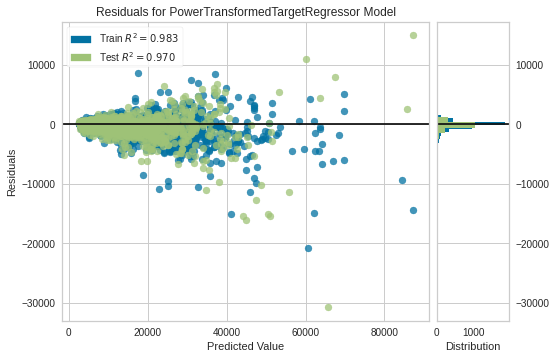

In [31]:
plot_model(tuned_catboost2)

**Stage 6.2:** Predict Error Plot

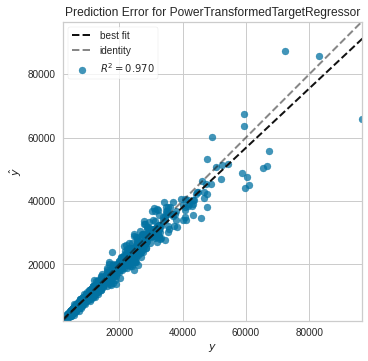

In [32]:
plot_model(tuned_catboost2, plot = 'error')

**Stage 6.3:** Feature Importance Plot

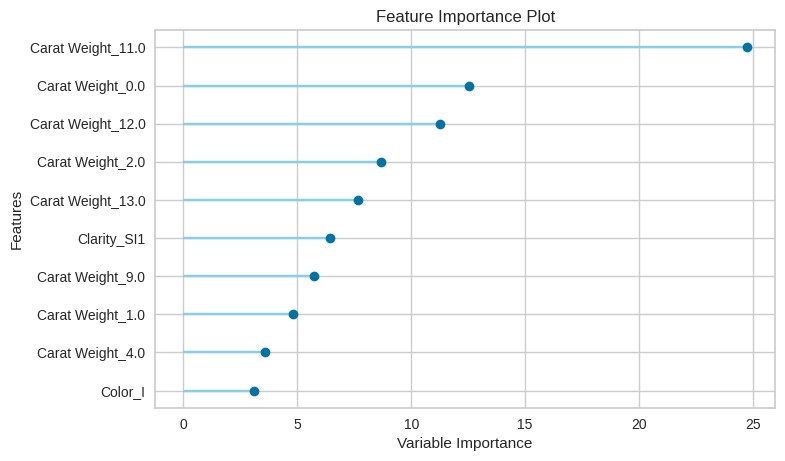

In [35]:
plot_model(tuned_catboost2, plot='feature')

**Stage 7:** Predict on the test/hold-out sample

It is best to perform one final check before finalizing the model - by predicting the test/hold-out set and reviewing the evaluation metrics. Earlier, 30% of the data (unseen data) has be differentiated as a test/hold-out sample and 70% of the cross-validation results are based on the training set. 

Using the final trained model stored in tuned_catboost2 variable, we can predict the hold-out sample and check if the metrics a different than the cross-validated results.



In [38]:
predict_model(tuned_catboost2, round = 3);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,798.841,3129960.031,1769.169,0.97,0.078,0.058



The **R2** on the test/hold-out set is **0.97** compared to **0.973** achieved on tuned_catboost2 CV results

**Stage 8:** Finalizing Model for Deployment

In [48]:
final_catboost = finalize_model(tuned_catboost2)


In [49]:
print(final_catboost)


PowerTransformedTargetRegressor(border_count=254, depth=9, l2_leaf_reg=5,
                                loss_function='RMSE', n_estimators=260,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123, random_strength=0.5,
                                regressor=<catboost.core.CatBoostRegressor object at 0x7f2e40f3f208>,
                                task_type='CPU', verbose=False)


**Stage 9:** Predict on Unseen Data

In [50]:
unseen_predictions = predict_model(final_catboost, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12321.266421
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10102.100921
2,1.01,Good,E,SI1,G,G,GIA,5161,5094.791768
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,32053.149724
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4185.956459


In [51]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.983

**Stage 10:** Save the model

In [53]:
save_model(final_catboost,'Final CatBoost Model 11JAN2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  PowerTransformedTargetRegressor(border_count=254, depth=9,
                                                  l2_leaf_reg=5,
                                                  loss_function='RMSE',